In [1]:
#The first step is loading our pickel files for dataset

In [2]:
import pickle
import numpy as np
import torch

infile = open("train.pkl",'rb')
dataset = pickle.load(infile)
infile.close()

In [3]:
for img_id in range(dataset.shape[0]):
    dataset[img_id] = (dataset[img_id] - torch.min(dataset[img_id])) / (torch.max(dataset[img_id]) - torch.min(dataset[img_id]))
noisy_dataset = dataset + (25 / 255) * np.random.randn(200*1600,40,40)

In [4]:
training_data = []
for i, img in enumerate(noisy_dataset):
    training_data.append((img[None,:,:], dataset[i,None,:,:]))

In [5]:
train_loader = torch.utils.data.DataLoader(training_data,batch_size=128,shuffle=True)

In [6]:
len(training_data[0][0])

1

torch.Size([128, 1, 40, 40])


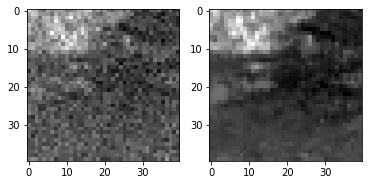

In [7]:
#Now that the dataset is prepared and shuffled, we can call the model function
import matplotlib.pyplot as plt
for noisy, clean in train_loader:
    print(noisy.shape)
    plt.subplot(1,2,1)
    plt.imshow(noisy[0,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(clean[0,0], cmap='gray')
    break

In [8]:
!ls

BSDS300				  train.pkl
BSDS300-20220507T194713Z-001.zip  training_dnCNN_IVP.py
Dataset_IVP.ipynb		  training_dnCNN_IVP_Noise_15_D15.ipynb
DnCNN_IVP.ipynb			  training_dnCNN_IVP_Noise_15_D20.ipynb
dncnn15.pt			  training_dnCNN_IVP_Noise_25_D15.ipynb
dncnn15_D15.pt			  training_dnCNN_IVP_Noise_25_D20.ipynb
dncnn_noise_15_D15.pt		  training_dnCNN_IVP_Noise_50_D15.ipynb
dncnn_noise_15_D20.pt		  training_dnCNN_IVP_Noise_50_D20.ipynb
dncnn_noise_25_D15.pt		  training_loss_noise_15_D20.txt
dncnn_noise_25_D20.pt		  training_loss_noise_25_D15.txt
dncnn_noise_50_D15.pt		  training_loss_noise_25_D20.txt
dncnn_noise_50_D20.pt		  training_loss_noise_50_D15.txt
test.pkl			  training_loss_noise_50_D20.txt
testing_dnCNN_IVP.ipynb


In [9]:
#pip install import-ipynb
#https://stackoverflow.com/questions/20186344/importing-an-ipynb-file-from-another-ipynb-file

In [10]:
import import_ipynb


In [11]:
import DnCNN_IVP

importing Jupyter notebook from DnCNN_IVP.ipynb


In [12]:
#Now that it is imported, let us create an instance
# model=DnCNN_IVP.DnCNN(1,1,20)
device=torch.device('cuda:0')
# model.to(device)

In [13]:
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [14]:
from torchsummary import summary
# summary(model,input_size=(1,180,180))

In [15]:
N=128
from torch import nn
class loss_new(nn.Module): #N is dataset size
  def __init__(self):
    super(loss_new,self).__init__()
  def forward(self,out,y,x):
    return torch.norm(out-(y-x))/(2*N) #Where does N get defined?

In [16]:
import torch
from torch import optim
# optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9, weight_decay=0.0001)

In [17]:
criterion=loss_new()

In [18]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [19]:
#Need to set a batch size of 128
#Tensor to data loader
def training_function(net, loader, optim, model_name, epochs=50):
  from tqdm import tqdm
  loss_list=[]
  net.train()
  """
    y is the noisy image and it is used as input

    x is the noiseless image and it is used as a target label
  """
    
  for e in tqdm(range(epochs)): #For each epoch
    train_loss=0
    for i, (noisy, clean) in enumerate(loader):
      optim.zero_grad()#zero grad so they don't stack
      clean = clean.to(device, dtype=torch.float)
      noisy = noisy.to(device, dtype=torch.float)
      prediction = net(noisy)
      batch_loss = criterion(prediction, noisy, clean)
      batch_loss.backward()
      optim.step()
      scheduler.step()
      train_loss += batch_loss.item()

    train_loss = train_loss/len(loader)
    loss_list.append(train_loss)

    print ("Epoch {}: Has a loss of Loss: {:.6f}".format(e+1 ,train_loss))

  torch.save(model.state_dict(), model_name + '_D15.pt')
  return loss_list

In [20]:
from torch.optim.lr_scheduler import StepLR
model=DnCNN_IVP.DnCNN(1,1,15)
device=torch.device('cuda:0')
model.to(device)
epoch = 50

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.001**(1/50))
print('beginning with training 15')

plot_me_25_D15=training_function(model, train_loader, optimizer, 'dncnn_noise_25', 50)

beginning with training 15


  2%|▏         | 1/50 [02:31<2:03:38, 151.40s/it]

Epoch 1: Has a loss of Loss: 0.278037


  4%|▍         | 2/50 [05:02<2:00:58, 151.22s/it]

Epoch 2: Has a loss of Loss: 0.224025


  6%|▌         | 3/50 [07:33<1:58:26, 151.19s/it]

Epoch 3: Has a loss of Loss: 0.224033


  8%|▊         | 4/50 [10:04<1:55:53, 151.15s/it]

Epoch 4: Has a loss of Loss: 0.223857


 10%|█         | 5/50 [12:35<1:53:21, 151.14s/it]

Epoch 5: Has a loss of Loss: 0.223911


 12%|█▏        | 6/50 [15:07<1:50:50, 151.15s/it]

Epoch 6: Has a loss of Loss: 0.223984


 14%|█▍        | 7/50 [17:38<1:48:19, 151.15s/it]

Epoch 7: Has a loss of Loss: 0.223796


 16%|█▌        | 8/50 [20:09<1:45:48, 151.16s/it]

Epoch 8: Has a loss of Loss: 0.224040


 18%|█▊        | 9/50 [22:40<1:43:17, 151.16s/it]

Epoch 9: Has a loss of Loss: 0.223654


 20%|██        | 10/50 [25:11<1:40:48, 151.21s/it]

Epoch 10: Has a loss of Loss: 0.223780


 22%|██▏       | 11/50 [27:43<1:38:16, 151.20s/it]

Epoch 11: Has a loss of Loss: 0.223670


 24%|██▍       | 12/50 [30:14<1:35:45, 151.20s/it]

Epoch 12: Has a loss of Loss: 0.223581


 26%|██▌       | 13/50 [32:45<1:33:14, 151.19s/it]

Epoch 13: Has a loss of Loss: 0.224066


 28%|██▊       | 14/50 [35:16<1:30:42, 151.19s/it]

Epoch 14: Has a loss of Loss: 0.224015


 30%|███       | 15/50 [37:47<1:28:11, 151.20s/it]

Epoch 15: Has a loss of Loss: 0.223901


 32%|███▏      | 16/50 [40:18<1:25:40, 151.19s/it]

Epoch 16: Has a loss of Loss: 0.223783


 34%|███▍      | 17/50 [42:50<1:23:09, 151.19s/it]

Epoch 17: Has a loss of Loss: 0.223877


 36%|███▌      | 18/50 [45:21<1:20:37, 151.18s/it]

Epoch 18: Has a loss of Loss: 0.224073


 38%|███▊      | 19/50 [47:52<1:18:07, 151.20s/it]

Epoch 19: Has a loss of Loss: 0.223652


 40%|████      | 20/50 [50:23<1:15:35, 151.19s/it]

Epoch 20: Has a loss of Loss: 0.223736


 42%|████▏     | 21/50 [52:54<1:13:04, 151.19s/it]

Epoch 21: Has a loss of Loss: 0.224087


 44%|████▍     | 22/50 [55:26<1:10:33, 151.20s/it]

Epoch 22: Has a loss of Loss: 0.223940


 46%|████▌     | 23/50 [57:57<1:08:02, 151.19s/it]

Epoch 23: Has a loss of Loss: 0.223829


 48%|████▊     | 24/50 [1:00:28<1:05:31, 151.20s/it]

Epoch 24: Has a loss of Loss: 0.223798


 50%|█████     | 25/50 [1:02:59<1:03:00, 151.23s/it]

Epoch 25: Has a loss of Loss: 0.224062


 52%|█████▏    | 26/50 [1:05:31<1:00:29, 151.23s/it]

Epoch 26: Has a loss of Loss: 0.223772


 54%|█████▍    | 27/50 [1:08:02<57:58, 151.22s/it]  

Epoch 27: Has a loss of Loss: 0.223745


 56%|█████▌    | 28/50 [1:10:33<55:27, 151.23s/it]

Epoch 28: Has a loss of Loss: 0.224117


 58%|█████▊    | 29/50 [1:13:04<52:55, 151.22s/it]

Epoch 29: Has a loss of Loss: 0.223949


 60%|██████    | 30/50 [1:15:35<50:24, 151.23s/it]

Epoch 30: Has a loss of Loss: 0.223805


 62%|██████▏   | 31/50 [1:18:07<47:53, 151.22s/it]

Epoch 31: Has a loss of Loss: 0.223638


 64%|██████▍   | 32/50 [1:20:38<45:22, 151.23s/it]

Epoch 32: Has a loss of Loss: 0.223971


 66%|██████▌   | 33/50 [1:23:09<42:50, 151.22s/it]

Epoch 33: Has a loss of Loss: 0.223992


 68%|██████▊   | 34/50 [1:25:40<40:19, 151.21s/it]

Epoch 34: Has a loss of Loss: 0.224037


 70%|███████   | 35/50 [1:28:12<37:48, 151.23s/it]

Epoch 35: Has a loss of Loss: 0.223753


 72%|███████▏  | 36/50 [1:30:43<35:17, 151.22s/it]

Epoch 36: Has a loss of Loss: 0.224359


 74%|███████▍  | 37/50 [1:33:14<32:46, 151.23s/it]

Epoch 37: Has a loss of Loss: 0.223668


 76%|███████▌  | 38/50 [1:35:45<30:14, 151.22s/it]

Epoch 38: Has a loss of Loss: 0.223575


 78%|███████▊  | 39/50 [1:38:16<27:43, 151.22s/it]

Epoch 39: Has a loss of Loss: 0.223631


 80%|████████  | 40/50 [1:40:48<25:12, 151.22s/it]

Epoch 40: Has a loss of Loss: 0.223815


 82%|████████▏ | 41/50 [1:43:19<22:41, 151.23s/it]

Epoch 41: Has a loss of Loss: 0.223768


 84%|████████▍ | 42/50 [1:45:50<20:09, 151.23s/it]

Epoch 42: Has a loss of Loss: 0.224133


 86%|████████▌ | 43/50 [1:48:21<17:38, 151.22s/it]

Epoch 43: Has a loss of Loss: 0.224018


 88%|████████▊ | 44/50 [1:50:53<15:07, 151.23s/it]

Epoch 44: Has a loss of Loss: 0.223842


 90%|█████████ | 45/50 [1:53:24<12:36, 151.22s/it]

Epoch 45: Has a loss of Loss: 0.223676


 92%|█████████▏| 46/50 [1:55:55<10:04, 151.22s/it]

Epoch 46: Has a loss of Loss: 0.223847


 94%|█████████▍| 47/50 [1:58:26<07:33, 151.26s/it]

Epoch 47: Has a loss of Loss: 0.223580


 96%|█████████▌| 48/50 [2:00:58<05:02, 151.26s/it]

Epoch 48: Has a loss of Loss: 0.223999


 98%|█████████▊| 49/50 [2:03:29<02:31, 151.26s/it]

Epoch 49: Has a loss of Loss: 0.223698


100%|██████████| 50/50 [2:06:00<00:00, 151.21s/it]

Epoch 50: Has a loss of Loss: 0.223859


In [21]:
with open('training_loss_noise_25_D15.txt', 'w') as f:
    f.writelines([str(loss) + '\n' for loss in plot_me_25_D15])

In [22]:
# import matplotlib.pyplot as plt
# plt.plot([i for i in range(0,50)], plot_me_25_D15, 'red', label= "noise-25-D15")
# # plt.plot([i for i in range(0,50)], plot_me_25, 'black', label= "noise-25")
# # plt.plot([i for i in range(0,50)], plot_me_50, 'blue', label= "noise-50")
# plt.legend()
# plt.savefig('training_curve_noise_25_D15.png')

In [23]:
# We can't use a learning rate as high as theirs because we didn't take patches so we have less data and if we just learn super fast, model will explode and oscilate

In [24]:
# torch.save(model.state_dict(), "dncnn15_0point00001.pt")

In [25]:
# loaded=torch.load("dncnn15_0point0001.pt")

In [26]:
#6 zeros slow
#3 zeros great
#1 zero explodes

In [27]:
# model=DnCNN_IVP.DnCNN(1,1,20)
# model.to(device)

In [28]:
# criterion=loss_new()
# optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.0001)

In [29]:
# infile = open("BSDS_25.pkl",'rb')
# dataset = pickle.load(infile) #x,y or clean, noisety
# infile.close()
# train_loader=torch.utils.data.DataLoader(dataset,batch_size=32,shuffle=True)

In [30]:
# plot_me=training_function(model,train_loader,optimizer,50)

In [31]:
##### 